### Pair Visualización
Ejercicios visualización

En este pair programming usaremos el csv que generamos en el pair programming de ayer, el de la gestión de nulos. A lo largo de este ejercicio plantearemos una serie de preguntas que tendrás que contestar usando la visualización (podréis usar tanto Seaborn como Matplotlib).

In [2]:
#Importo librerías
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

#Configuro el DF.
pd.set_option('display.max_columns', None) 

#Abro el csv
df= pd.read_csv('df_continentes_sinnulos.csv', index_col=0)
df.head(1)

,country,density,abbreviation,capitalmajorcity,currencycode,largestcity,officiallanguage,longitude,latitude,continent,urbanpopulation,unemploymentrate,totaltaxrate,population,minimumwage,maternalmortalityratio,gdp,cpichange,cpi,co2emissions,physiciansperthousand,outofpockethealthexpenditure,lifeexpectancy,infantmortality,grosstertiaryeducationenrollment,gasolineprice,fertilityrate,callingcode,birthrate,armedforcessize,landarea,agriculturalland,taxrevenue,populationlaborforceparticipation,forestedarea
0,Afghanistan,60.0,AF,Kabul,AFN,Kabul,Pashto,67.709953,33.93911,Asia,9797273.0,11.12,71.4,38041754.0,0.43,638.0,1.910135e+10,2.3,149.9,8672.0,0.28,78.4,64.5,47.9,9.7,0.7,4.47,93.0,32.49,323000.0,652230.0,58.1,9.3,48.9,2.1


1. ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

In [3]:
#Busco la columna que me interesa analizar.
df.columns
#Y analizo los valores que contiene.
df['birthrate'].info

<bound method Series.info of 0      32.49
1      11.78
2      24.28
3       7.20
4      40.73
       ...  
189    17.88
190    16.75
191    30.45
192    36.19
193    30.68
Name: birthrate, Length: 194, dtype: float64>

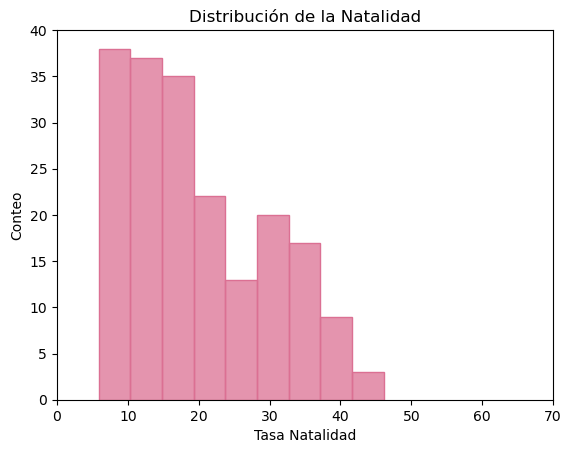

In [14]:
#Utilizo el histograma para mostrar la distribución de la columna birthrate, una variable numérica tipo float. 
sns.histplot(
    x = 'birthrate',
    data = df, color = 'palevioletred', 
    edgecolor='palevioletred');

#Nombro la tabla.
plt.title('Distribución de la Natalidad')

#Nombro los ejes
plt.xlabel('Tasa Natalidad')
plt.ylabel('Conteo')

#Cambio el rango de los ejes.
plt.xlim(0, 70)  # Ajusta los valores según tus necesidades
plt.ylim(0, 40);

- **Observación:** La mayoría de los valores se agrupan a la izquierda del gráfico.

- **Interpretación:** La mayoría de las tasas de natalidad son bajas, pero hay algunas observaciones con tasas de natalidad significativamente más altas.

2. ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.

In [ ]:
df[['infantmortality', 'lifeexpectancy']]

,infantmortality,lifeexpectancy
0,47.9,64.5
1,7.8,78.5
2,20.1,76.7
3,2.7,73.3
4,51.6,60.8
...,...,...
189,21.4,72.1
190,16.5,75.3
191,42.9,66.1
192,40.4,63.5


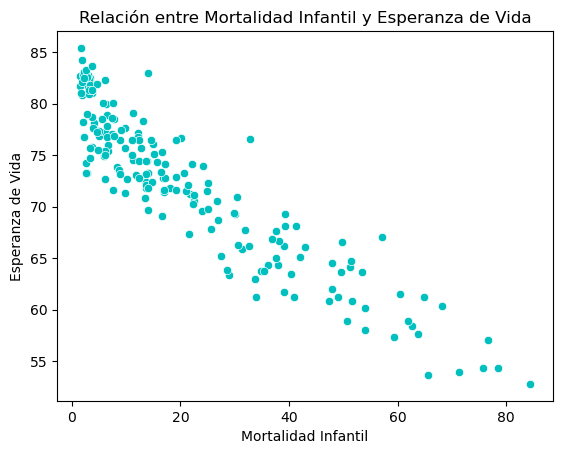

In [ ]:
#Utilizo la librería seaborn, con el método scatterplo ya que perminte mostrar la relación de dos variables numéricas.
sns.scatterplot(x = 'infantmortality', 
                y = 'lifeexpectancy', 
                data = df,
                color='c')

#Nombro la tabla.
plt.title('Relación entre Mortalidad Infantil y Esperanza de Vida')

#Nombro los ejes
plt.xlabel('Mortalidad Infantil')
plt.ylabel('Esperanza de Vida');

- **Observación:** Los valores forman una linea descendente desde la parte superior izquierda del gráfico, hacia la parte inferior derecha.

- **Interpretación:** Cuanto mayor es el índice de mortalidad infantil, menor es la esperanza de vida. 

3. ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

In [15]:
#Utilizo value_counts() para contar el número de países que tiene cada continente.
df_continentes= df['continent'].value_counts().reset_index()
df_continentes

,continent,count
0,África,54
1,Asia,49
2,Europa,49
3,América,35
4,Oceanía,7


In [ ]:
#Como hay contintentes con más paises de los que deberían tener, ajusto manualmente la clasificación.
#Reasigno los países no africanos.
df[df['continent'] == 'África']['country']
no_africanos = ['Bahrain','Kuwait','Oman','Qatar','Saudi Arabia','United Arab Emirates']
df.loc[df['country'].isin(no_africanos), 'continent'] = 'Asia'

#Reasigno los países no asiáticos.
df[df['continent'] == 'Asia']['country']
no_asiaticos = ['Armenia', 'Azerbaijan', 'Georgia', 'Turkey', 'Ukraine']
df.loc[df['country'].isin(no_asiaticos), 'continent'] = 'Europa'

#Reasigno los países no americanos.
df[df['continent'] == 'América']['country']
no_americanos = ['Kiribati' , 'Samoa', 'Tonga']
df.loc[df['country'].isin(no_americanos), 'continent'] = 'Oceanía'

#Reasigno los países no otro.
df[df['continent'] == 'Otro']['country']
americanos = ['Antigua and Barbuda', 'The Bahamas', 'Belize', 'Canada', 'Cuba', 'Dominica', 
'Dominican Republic','Grenada','Guatemala','Haiti','Honduras', 'Jamaica', 'Mexico', 
'Saint Kitts and Nevis','Trinidad and Tobago', 'United States', 'Barbados', 'Bolivia',
'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Ecuador', 'El Salvador','Guyana',
'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
df.loc[df['country'].isin(americanos), 'continent'] = 'América'
#Elimino posibles duplicados.
df[df['continent'] == 'América']['country'].drop_duplicates()

df[df['continent'] == 'Otro']['country']
asiaticos = ['Iran','Iraq','Israel', 'Jordan', 'Lebanon', 'Palestinian National Authority', 'Syria'] 
df.loc[df['country'].isin(asiaticos), 'continent'] = 'Asia'
#Elimino posibles duplicados.
df[df['continent'] == 'Asia']['country'].drop_duplicates()

df[df['continent'] == 'Otro']['country']
africanos = ['Cape Verde', 'Morocco', 'Tunisia']
df.loc[df['country'].isin(africanos), 'continent'] = 'África'
#Elimino posibles duplicados.
df[df['continent'] == 'África']['country'].drop_duplicates()

df[df['continent'] == 'Otro']['country']
oceanicos= ['Kiribati', 'Samoa', 'Tonga']
df.loc[df['country'].isin(oceanicos), 'continent'] = 'Oceanía'
#Elimino posibles duplicados.
df[df['continent'] == 'Oceanía']['country'].drop_duplicates()


In [ ]:
#Guardo los cambios en el csv.
df.to_csv('df_continentes_sinnulos.csv')

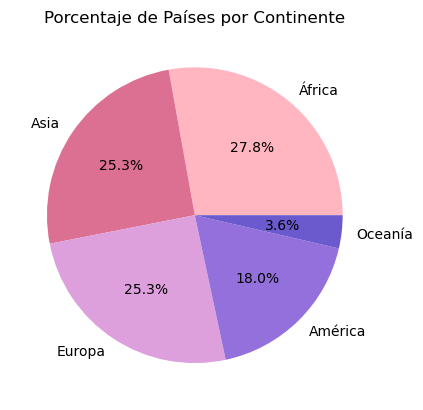

In [ ]:
#Para calcular y mostrar los porcentajes, utilizo el método Pipeplot o Gráfico de Quesitos dado que 'continent' es una variable categórica.
#Creo el gráfico basándonos en el DataFrame que hemos creado en el paso anterior.
plt.pie(df_continentes['count'], 
        labels = df_continentes['continent'], 
        autopct = "%1.1f%%", 
        colors = ['lightpink', 'palevioletred', 'plum', 'mediumpurple', 'slateblue' ,'darkslateblue'])

plt.title("Porcentaje de Países por Continente");

4. ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos.

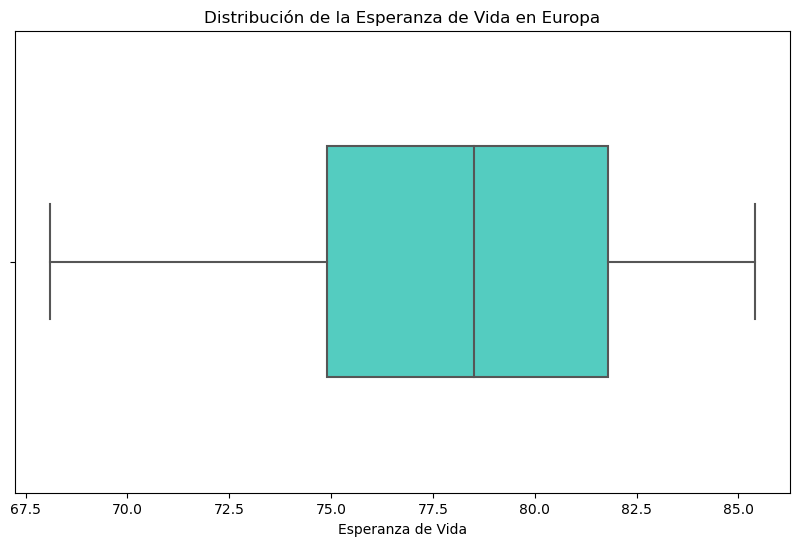

In [20]:
df_europa = df[df['continent'] == 'Europa']

# Crear el boxplot con seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='lifeexpectancy', data=df_europa, width=0.5, color='turquoise')
plt.title('Distribución de la Esperanza de Vida en Europa')
plt.xlabel('Esperanza de Vida');

In [ ]:
#Compruebo el dato exacto de la mediana y lo comparo con la media.
mediana = df[df['continent'] == 'Europa']['lifeexpectancy'].median()
print(f'La mediana es de: {mediana} años')
print('.................................')
media= df[df['continent'] == 'Europa']['lifeexpectancy'].mean()
print(f'La media es de: {media} años')


La mediana es de: 78.5 años
.................................
La media es de: 78.41020408163266 años


- **Observación:** No se observan valores atípicos en el boxplot de la esperanza de vida para los países europeos.

- **Interpretación:** La mediana de la esperanza de vida, representada por la línea horizontal dentro de la caja del boxplot, coincide con la media y está situada alrededor de los 78 años. Esto sugiere que la mayoría de los países europeos tienen una esperanza de vida similar y no muestran variaciones significativas que se consideren atípicas. 

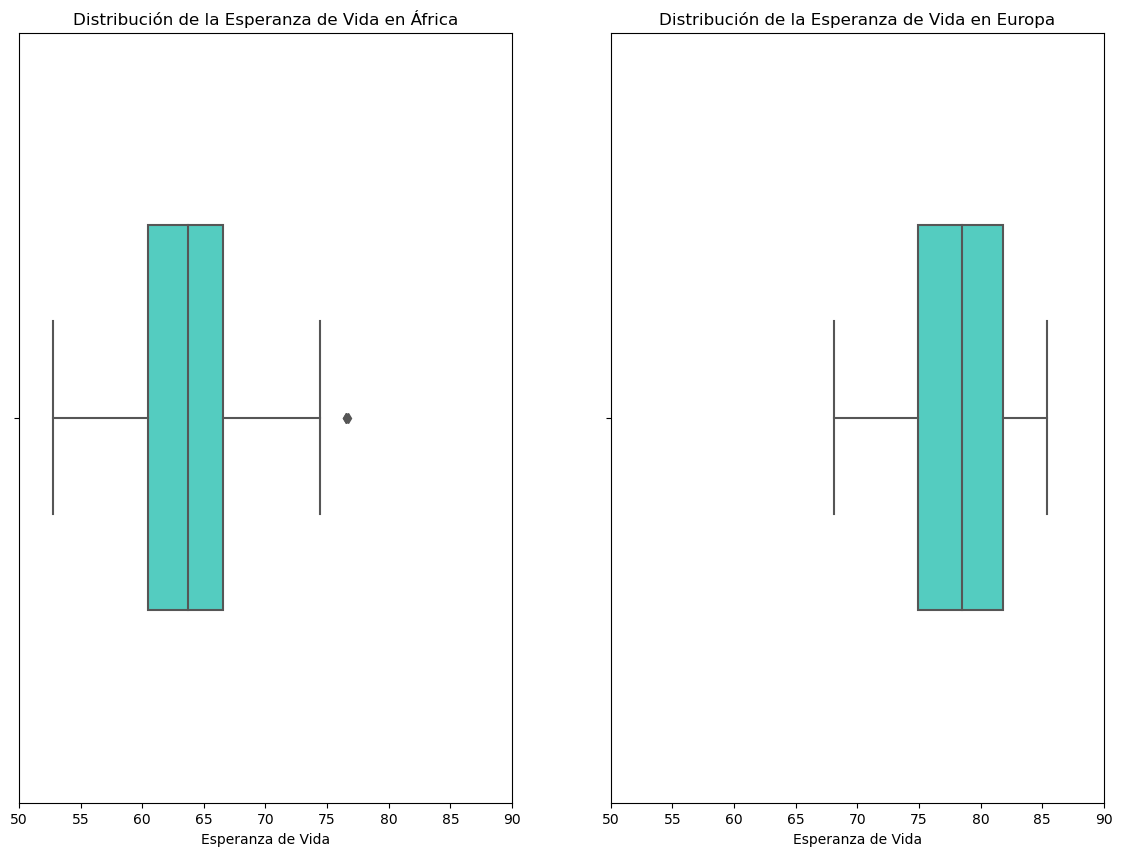

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))

# Filtrar datos para África
df_africa = df[df['continent'] == 'África']

# Crear el boxplot para África
sns.boxplot(x='lifeexpectancy', data=df_africa, width=0.5, color='turquoise', ax=axes[0])
axes[0].set_title('Distribución de la Esperanza de Vida en África')
axes[0].set_xlabel('Esperanza de Vida')
axes[0].set_xlim(50, 90)

# Filtrar datos para Europa
df_europa = df[df['continent'] == 'Europa']

# Crear el boxplot para Europa
sns.boxplot(x='lifeexpectancy', data=df_europa, width=0.5, color='turquoise', ax=axes[1])
axes[1].set_title('Distribución de la Esperanza de Vida en Europa')
axes[1].set_xlabel('Esperanza de Vida')
axes[1].set_xlim(50, 90);

5. ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.

In [ ]:
#Busco las variables númericas que he de relacionar.
df.columns
df['birthrate'], df['infantmortality'], df['lifeexpectancy'], df['density'], df['population']

Index(['country', 'density', 'abbreviation', 'capitalmajorcity',
       'currencycode', 'largestcity', 'officiallanguage', 'longitude',
       'latitude', 'continent', 'urbanpopulation', 'unemploymentrate',
       'totaltaxrate', 'population', 'minimumwage', 'maternalmortalityratio',
       'gdp', 'cpichange', 'cpi', 'co2emissions', 'physiciansperthousand',
       'outofpockethealthexpenditure', 'lifeexpectancy', 'infantmortality',
       'grosstertiaryeducationenrollment', 'gasolineprice', 'fertilityrate',
       'callingcode', 'birthrate', 'armedforcessize', 'landarea',
       'agriculturalland', 'taxrevenue', 'populationlaborforceparticipation',
       'forestedarea'],
      dtype='object')

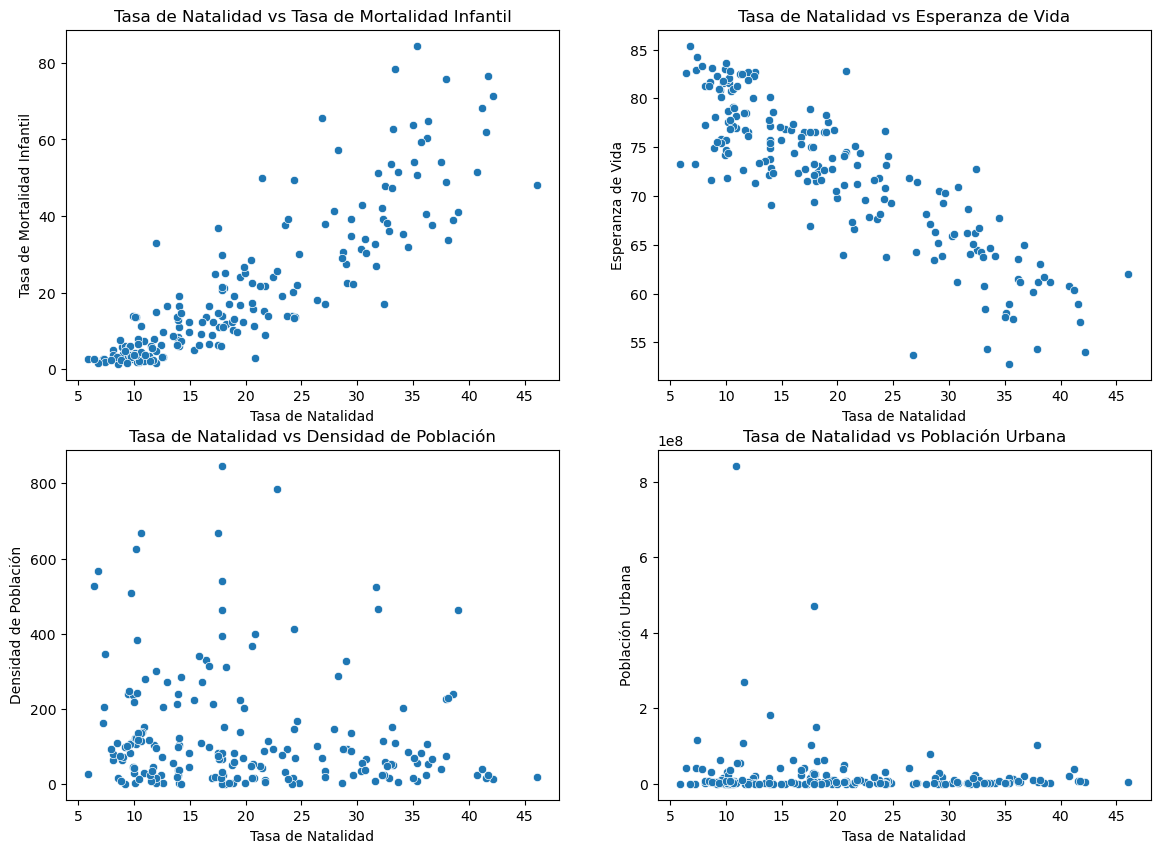

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 10))

sns.scatterplot(x='birthrate', y='infantmortality', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Tasa de Natalidad vs Tasa de Mortalidad Infantil')
axes[0, 0].set_xlabel('Tasa de Natalidad')
axes[0, 0].set_ylabel('Tasa de Mortalidad Infantil')

# Gráfico 2: Esperanza de vida vs Tasa de natalidad
sns.scatterplot(x='birthrate', y='lifeexpectancy', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Tasa de Natalidad vs Esperanza de Vida')
axes[0, 1].set_xlabel('Tasa de Natalidad')
axes[0, 1].set_ylabel('Esperanza de Vida')

# Gráfico 3: Densidad de población vs Tasa de natalidad
sns.scatterplot(x='birthrate', y='density', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Tasa de Natalidad vs Densidad de Población')
axes[1, 0].set_xlabel('Tasa de Natalidad')
axes[1, 0].set_ylabel('Densidad de Población')

# Gráfico 4: Población urbana vs Tasa de natalidad
sns.scatterplot(x='birthrate', y='urbanpopulation', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Tasa de Natalidad vs Población Urbana')
axes[1, 1].set_xlabel('Tasa de Natalidad')
axes[1, 1].set_ylabel('Población Urbana');


- **Observación:** La tasa de natalidad está claramente relacionada con la tasa de mortalidad infantil y la esperanza de vida. 
Las tablas que relacionan la tasa de natalidad con la densidad de población o con la población urbana no parecen ofrecer datos relevantes. 
Pruebo a realizar los mismos gráficos pero utilizando una transformación logarítmica de los datos de densidad y población urbana.

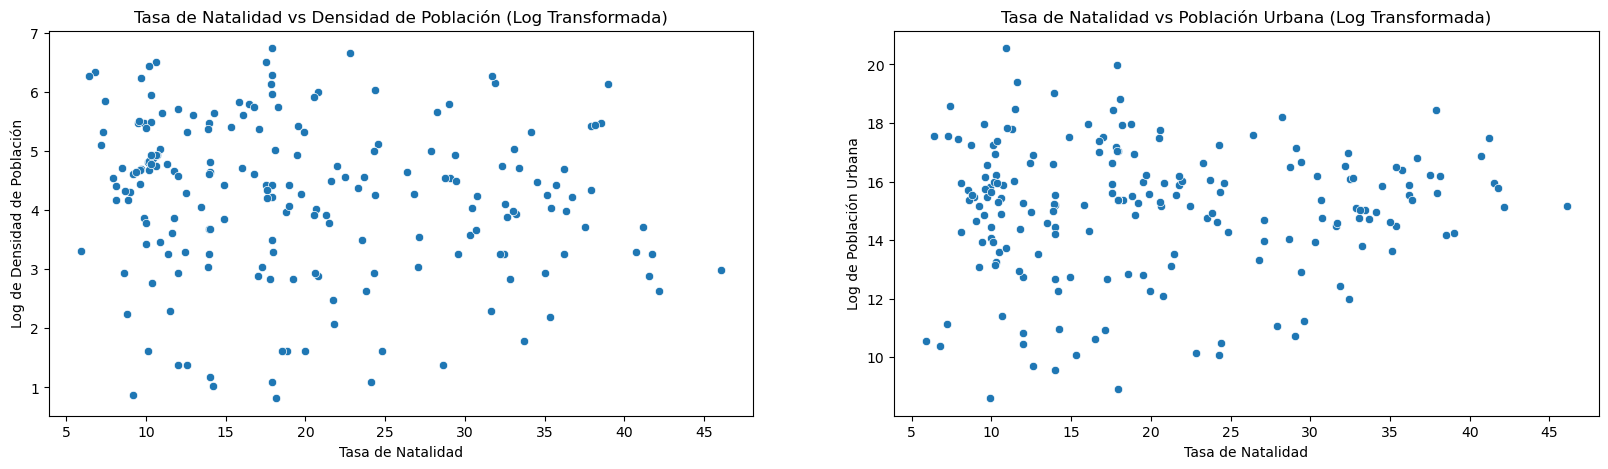

In [ ]:
df['log_density'] = np.log1p(df['density'])
df['log_urbanpopulation'] = np.log1p(df['urbanpopulation'])

# Crear subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Gráfico 3: Densidad de población (log) vs Tasa de natalidad
sns.scatterplot(x='birthrate', y='log_density', data=df, ax=axes[0])
axes[0].set_title('Tasa de Natalidad vs Densidad de Población (Log Transformada)')
axes[0].set_xlabel('Tasa de Natalidad')
axes[0].set_ylabel('Log de Densidad de Población')

# Gráfico 4: Población urbana (log) vs Tasa de natalidad
sns.scatterplot(x='birthrate', y='log_urbanpopulation', data=df, ax=axes[1])
axes[1].set_title('Tasa de Natalidad vs Población Urbana (Log Transformada)')
axes[1].set_xlabel('Tasa de Natalidad')
axes[1].set_ylabel('Log de Población Urbana');


- **Interpretación:** Los países con mayor natalidad, tienden a tener una esperanza de vida más baja. 
Los gráficos de densidad de población y de población urbana tienen una marcada dispersión horizontal, lo que significaría que la tasa de natalidad no estaría estrechamente relacionada con estas otras dos variables. Es decir, no porque aumente la natalidad aumenta necesariamente la densidad de población o la concentración de población urbana.


6. ¿Cuáles son los 10 países con la mayor área forestal?

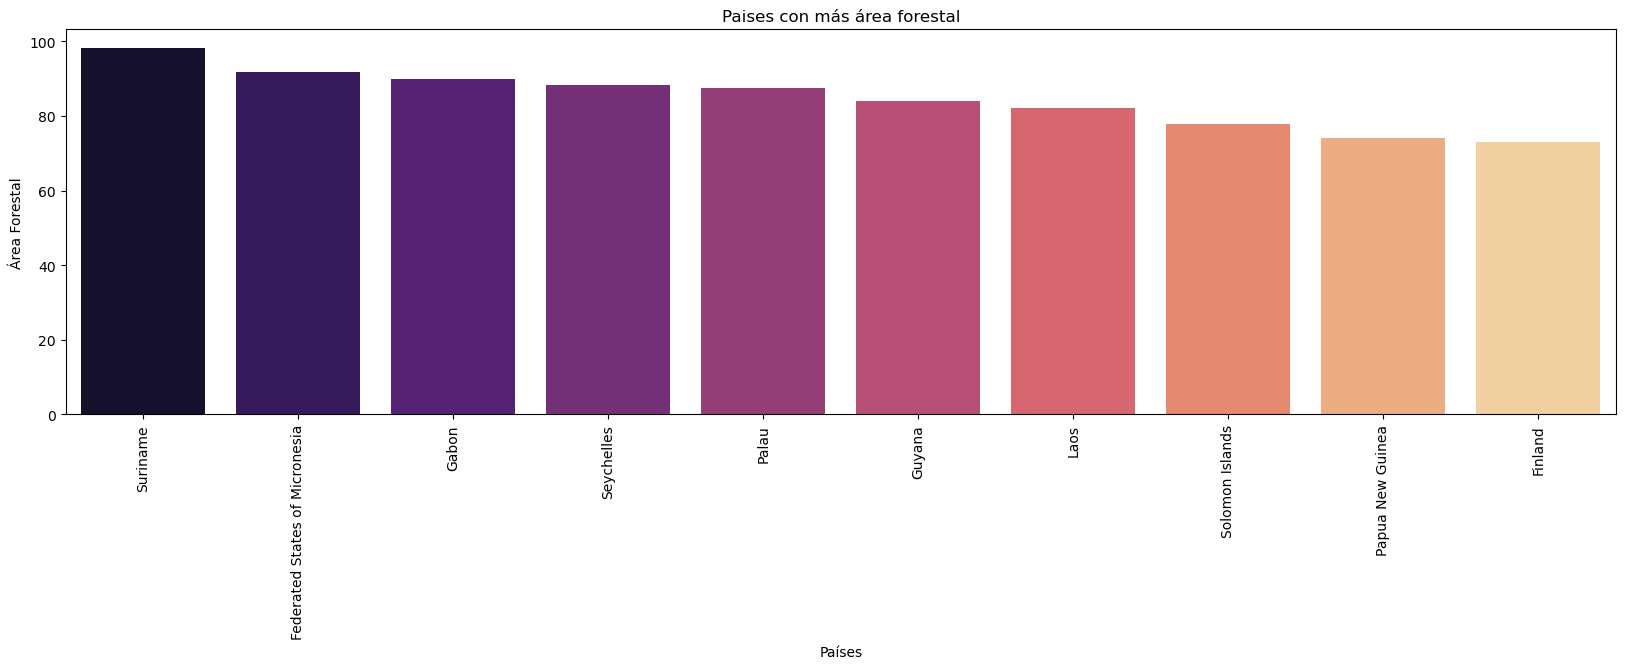

In [ ]:
#Primero ordeno los países en función del área forestal
top_paises = df.sort_values(by='forestedarea', ascending=False).head(10)

#Creo el gráfico de barras
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,5))
sns.barplot(x = "country", 
            y = "forestedarea", 
            data = top_paises, 
            palette = "magma")

plt.title('Paises con más área forestal')
plt.xlabel('Países')
plt.ylabel('Área Forestal')

#Giro las etiquetas del eje horizontal para que sean más legibles.
plt.xticks(rotation = 90);